# 8- MÉTRICAS

 La rápida expansión de NILM y el desarrollo de diferentes algoritmos, han hecho que sea esencial proporcionar una evaluación de rendimiento mediante el uso de métricas de desempeño. Las métricas de evaluación, comparan los resultados de la desagregaciónn (predicciones) de los modelos entrenados con los datos del set de validación (mediciones reales de cada proceso). NILMTK cuenta con el cálculo de métricas de evaluación mediante el uso del MeterGroup para la validación de los resultados mediante el set de validación 
 Vamos ahora analizar en nuestro dataset diferentes metricas como son FEAC,F1, EAE ,MNEAP y RMSE  que  resumimos a continuacion en el siguinte cuadro:

![metricas](metricas.jpg)

En primer lugar cargamos las ibrerías y realizamos otros ajustes:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings
warnings. filterwarnings("ignore")
plt.style.use('bmh')

from nilmtk import TimeFrame, MeterGroup, HDFDataStore, DataSet
from nilmtk.metrics import fraction_energy_assigned_correctly, mean_normalized_error_power
from nilmtk.metrics import rms_error_power, f1_score, error_in_assigned_energy

data_dir='./data/'

### Métricas individuales del modelo

In [2]:
#Librerías
from nilmtk.metrics import f1_score
from nilmtk.metrics import error_in_assigned_energy
from nilmtk.metrics import mean_normalized_error_power
from nilmtk.metrics import rms_error_power
from nilmtk.metrics import fraction_energy_assigned_correctly

In [5]:



labels = pd.DataFrame({'Instances': list(range(1,7)),
                       'Meters': ['Main', 'Fryer', 'LED Lamp',  'Incandescent lamp','Laptop Computer', 'Fan']})



 

#Set para validación
valid = DataSet('ualm2.h5')

valid.set_window(start="2023-05-03 16:23:57", end="2023-05-03 23:23:57")


valid_elec = valid.buildings[1].elec

print('Medidor de cabecera para desagregación:')
valid_Main = valid_elec.mains()
print(valid_Main)

print('\nDispositivos para validación de entrenamiento:')
valid_Devices = valid_elec.select(instance=[2,3,4,5,6])
print(valid_Devices)



#dataset=DataSet(data_dir+'NILM/Results/FHMM_10s_first_pred.h5')
#predictions=dataset.buildings[1].elec.submeters()  
#	Fryer	LED Lamp	Incandescent lamp	Laptop Computer	Fan
#F1	0.761	0.891	0.846	0.214	0.679
#EAE	0.041	0.058	0.033	0.002	0.014
#MNEAP	0.431	0.619	0.339	1.224	0.694
#RMSE	17.049	16.235	19.811	7.568	10.259


dataset=DataSet(data_dir+'NILM/Results/CO_10s_first_pred.h5')
predictions=dataset.buildings[1].elec.submeters()  
#Fryer	LED Lamp	Incandescent lamp	Laptop Computer	Fan
#F1	0.707	0.821	0.786	0.305	0.748
#EAE	0.000	0.000	0.000	0.000	0.000
#MNEAP	0.697	0.699	0.506	2.018	0.742
#RMSE	19.626	16.919	21.683	11.639	10.307




#Datos de Dispositivos: predicción
# Se carga los resultados del mejor modelo
#dataset=DataSet(data_dir+'NILM/Results/CO_30s_first_pred.h5')
#Fryer	LED Lamp	Incandescent lamp	Laptop Computer	Fan
#F1	0.666	0.799	0.742	0.304	0.604
#EAE	0.043	0.034	0.017	0.051	0.006
#MNEAP	0.730	0.818	0.531	2.200	0.891
#RMSE	20.148	19.105	23.050	12.278	11.394

#dataset=DataSet(data_dir+'NILM/Results/FHMM_30s_first_pred.h5')
#	Fryer	LED Lamp	Incandescent lamp	Laptop Computer	Fan
#F1	0.663	0.835	0.773	0.227	0.646
#EAE	0.000	0.000	0.000	0.000	0.000
#MNEAP	0.607	0.947	0.433	1.206	0.739
#RMSE	18.956	21.017	19.596	7.471	10.352



#dataset=DataSet(data_dir+'NILM/Results/FHMM_60s_first_pred.h5')
#	Fryer	LED Lamp	Incandescent lamp	Laptop Computer	Fan
#F1	0.545	0.766	0.671	0.217	0.681
#EAE	0.000	0.000	0.000	0.000	0.000
#MNEAP	0.732	0.849	0.543	1.496	0.649
#RMSE	20.835	17.589	20.293	8.622	9.190

#dataset=DataSet(data_dir+'NILM/Results/CO_60s_median_pred.h5')
#predictions=dataset.buildings[1].elec.submeters() 
#	Fryer	LED Lamp	Incandescent lamp	Laptop Computer	Fan
#F1	0.715	0.730	0.716	0.240	0.519
#EAE	0.020	0.014	0.013	0.059	0.009
#MNEAP	0.587	0.715	0.521	2.461	0.949
#RMSE	17.040	16.713	20.941	13.238	11.616







#dataset=DataSet(data_dir+'NILM/Results/FHMM_5min_first_pred.h5')
#predictions=dataset.buildings[1].elec.submeters() 
#	Fryer	LED Lamp	Incandescent lamp	Laptop Computer	Fan
#F1	0.000	0.494	0.548	0.000	0.000
#EAE	0.086	0.113	0.012	0.012	0.018
#MNEAP	0.776	1.216	0.537	0.752	0.676
#RMSE	18.447	24.372	20.282	3.958	7.376



index = list(labels['Meters'][1:6])
met = []
e = []

















#Metricas
f1 = {}; eae = {}; feac = {}; mneap = {}; rmse = {};

f1['F1'] = f1_score(predictions, valid_Devices)

EAE = error_in_assigned_energy(predictions, valid_Devices)

for x in range(len(EAE)): e.append(EAE.iloc[x][0])
eae['EAE'] = e
#da error esta medida AttributeError: 'tuple' object has no attribute 'instance'
#feac['FEAC'] = np.ones(6)*(fraction_energy_assigned_correctly(predictions, valid_Devices))
#feac['FEAC'] = np.ones(6)*(fraction_energy_assigned_correctly(predictions, valid_Devices))
mneap['MNEAP'] = mean_normalized_error_power(predictions, valid_Devices)
rmse['RMSE'] = rms_error_power(predictions, valid_Devices)
met.append(pd.concat([pd.DataFrame(feac, index=valid_Devices.instance()),
                      pd.DataFrame(f1),
                      pd.DataFrame(eae, index=valid_Devices.instance()),
                      pd.DataFrame(mneap),
                      pd.DataFrame(rmse)],
                     axis=1).set_index(pd.Index(index)))

dataset.store.close()       
print('\n\nDone!')
metrics=met[0].transpose().round(3)
metrics

Medidor de cabecera para desagregación:
ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])

Dispositivos para validación de entrenamiento:
MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='incandescent lamp', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='laptop computer', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)


Done!


,Fryer,LED Lamp,Incandescent lamp,Laptop Computer,Fan
F1,0.715,0.730,0.716,0.240,0.519
EAE,0.020,0.014,0.013,0.059,0.009
MNEAP,0.587,0.715,0.521,2.461,0.949
RMSE,17.040,16.713,20.941,13.238,11.616


Carga de datos de predicciones y GT en memoria

In [6]:
gt=valid_elec.dataframe_of_meters(ac_type='active', sample_period=30, resample_kwargs={'how':'first'})


labels = pd.DataFrame({'Instances': list(range(1,7)),'Meters': ['Main', 'Fryer', 'LED Lamp',  'Incandescent lamp','Laptop Computer','Fan']})
                       
Meters={}
for x in range(len(labels)): Meters[valid_elec[x+1]]=labels['Meters'][x]
    

    
    
#resultados de predicción modelo CO 30s

CO_60s_median=DataSet(data_dir+'NILM/Results/CO_30s_median_pred.h5')
elec_CO_60s_median=CO_60s_median.buildings[1].elec

#resultados de predicción modelo FHMM 30s

FHMM_60s_median=DataSet(data_dir+'NILM/Results/FHMM_30s_median_pred.h5')
elec_FHMM_60s_median=FHMM_60s_median.buildings[1].elec    
    
    

gt.columns=list(Meters.values())
pred_CO=elec_CO_60s_median.dataframe_of_meters(ac_type='active')

pred_CO.columns=[list(Meters.values())[0]]+list(Meters.values())[1:6]

pred_FHMM=elec_FHMM_60s_median.dataframe_of_meters(ac_type='active')

pred_FHMM.columns=[list(Meters.values())[0]]+list(Meters.values())[1:6]

### Análisis particular del cálculo de cada métrica

Metrica FEAC ( da problema con AttributeError: 'tuple' object has no attribute 'instance')

In [41]:
#Carga de datos de predicciones y GT en memoria
#gt=valid_elec.dataframe_of_meters(ac_type='active', sample_period=60, resample_kwargs={'how':'first'})
#gt.columns=list(Meters.values())

In [42]:
#predictions_Devices=elec_CO_60s_first.submeters()

#frac_1 = valid_Devices.fraction_per_meter()
#frac_2 = predictions_Devices.fraction_per_meter()
#fig, (ax1, ax2) = plt.subplots(1, 2 ,gridspec_kw={'hspace': 0.1, 'wspace': 0.1})

#frac_1.plot(autopct=lambda p:'{:.0f}%'.format(p), kind='pie',labels=list(Meters.values())[1:6], figsize=(8,8), ax=ax1,   colors=['tab:blue','tab:orange','tab:green','tab:olive','tab:purple','tab:cyan'])
#frac_2.plot(autopct=lambda p:'{:.0f}%'.format(p), kind='pie',  labels=list(Meters.values())[1:6], figsize=(8,8), ax=ax2,  colors=['tab:blue','tab:orange','tab:green','tab:olive','tab:purple','tab:cyan']) 

#ax1.set(ylabel="")
#ax1.set(xlabel="GT")
#ax2.set(ylabel="")
#ax2.set(xlabel="Predictions")
#plt.savefig('./data/images/5.4_FEAC_CO_60s.svg', bbox_inches='tight', transparent=True)
#pass

## Métrica F1

Esta métrica mide la precisión o asertividad del modelo entrenado mediante el cálculo de la media armónica utilizando las métricas Precision y Recall. Estas métricas son calculadas internamente por NILMTK mediante la matriz de confusión, vease la ecuación de la figura siguiente.

![metricas](metricas.jpg)

Precision se entiende como la fracción de cortes de tiempo en los que se predijo correctamente que un proceso estaba activo, pero realmente se encontraba apagado. Por lo contrario, Recall hace referencia a la fracción de cortes de tiempo en los que se predijo correctamente que el dispositivo estaba encendido y realmente se encontraba encendido .

In [43]:
pd.DataFrame(metrics.loc['F1']).transpose()*100

,Fryer,LED Lamp,Incandescent lamp,Laptop Computer,Fan
F1,66.6,79.9,74.2,30.4,60.4


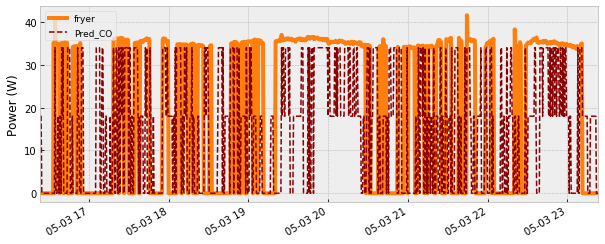

In [44]:
rcParams['figure.figsize'] = (10, 4)

fig, ax1 = plt.subplots();
ax1=gt['Fryer'].plot(lw=4, c='tab:orange')
pred_CO['Fryer'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['fryer','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylabel('Power (W)')

plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

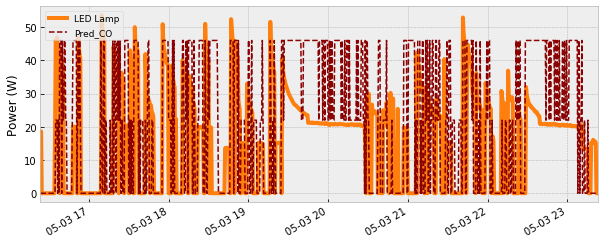

In [45]:
rcParams['figure.figsize'] = (10, 4)

fig, ax1 = plt.subplots();
ax1=gt['LED Lamp'].plot(lw=4, c='tab:orange')
pred_CO['LED Lamp'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['LED Lamp','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylabel('Power (W)')
#ax1.annotate('TP', xy=(250, 188), xycoords='figure points', xytext=(285, 210), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('TN', xy=(320, 38), xycoords='figure points', xytext=(400, 70), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('FN', xy=(300, 38), xycoords='figure points', xytext=(530, 70), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('FP', xy=(187, 188), xycoords='figure points', xytext=(220, 210), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
plt.savefig('./data/images/5.5_F1_CO_60s.svg', bbox_inches='tight', transparent=True)
pass

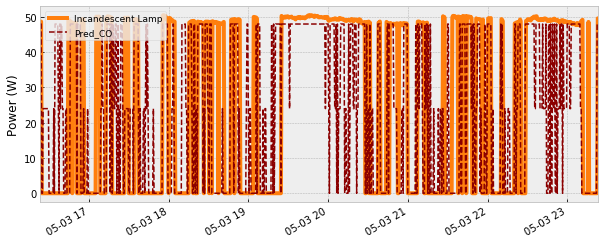

In [46]:
rcParams['figure.figsize'] = (10, 4)

fig, ax1 = plt.subplots();
ax1=gt['Incandescent lamp'].plot(lw=4, c='tab:orange')
pred_CO['Incandescent lamp'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Incandescent Lamp','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylabel('Power (W)')
#ax1.annotate('TP', xy=(250, 188), xycoords='figure points', xytext=(285, 210), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('TN', xy=(320, 38), xycoords='figure points', xytext=(400, 70), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('FN', xy=(300, 38), xycoords='figure points', xytext=(530, 70), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('FP', xy=(187, 188), xycoords='figure points', xytext=(220, 210), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
plt.savefig('./data/images/5.5_F1_CO_60s.svg', bbox_inches='tight', transparent=True)
pass

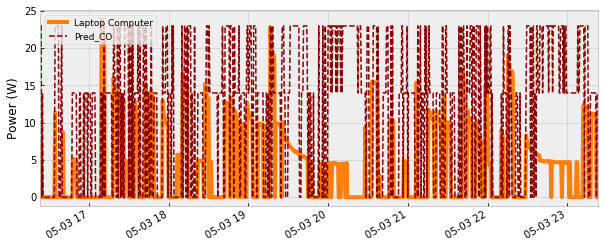

In [47]:
rcParams['figure.figsize'] = (10, 4)

fig, ax1 = plt.subplots();
ax1=gt['Laptop Computer'].plot(lw=4, c='tab:orange')
pred_CO['Laptop Computer'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Laptop Computer','Pred_CO'], fontsize=9, loc='upper left', ncol=1)

ax1.set_ylabel('Power (W)')
plt.savefig('./data/images/5.5_F1_CO_60s.svg', bbox_inches='tight', transparent=True)
pass

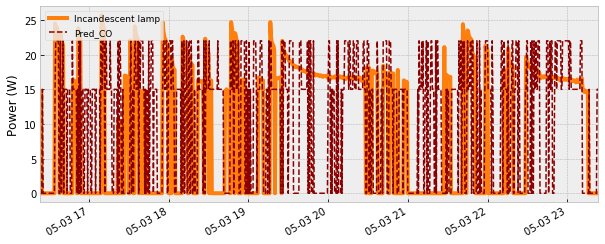

In [48]:
rcParams['figure.figsize'] = (10, 4)
fig, ax1 = plt.subplots();
ax1=gt['Fan'].plot(lw=4, c='tab:orange')
pred_CO['Fan'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Incandescent lamp','Pred_CO'], fontsize=9, loc='upper left', ncol=1)


ax1.set_ylabel('Power (W)')

plt.savefig('./data/images/5.5_F1_CO_60s.svg', bbox_inches='tight', transparent=True)
pass

## Métrica EAE

La ecuación de la figura representa la diferencia entre la energía total asignada yˆt(n) energía total consumida yt(n) por el proceso n de la industria en kWh 

![metricas](metricas.jpg)

In [49]:
round(pd.DataFrame(metrics.loc['EAE']).transpose(),2)

,Fryer,LED Lamp,Incandescent lamp,Laptop Computer,Fan
EAE,0.0,0.0,0.0,0.0,0.0


In [50]:
predictions_Devices=elec_CO_60s_median.submeters()
e1=predictions_Devices[5].total_energy()[0]
e2=valid_Devices[5].total_energy()[0]
eae=round(abs(e1-e2),2)

pd.DataFrame([e1,e2,eae], columns=['kWh'], index=['Energy_pred','Energy_GT','EAE'])

,kWh
Energy_pred,0.081308
Energy_GT,0.030783
EAE,0.050000


## Métrica MNEAP

Este indicador que representa la ecuacion de la imagen  consta de la diferencia entre la potencia asignada yˆt(n) y la potencia real yt(n) de cada proceso de la industria, por cada intervalo de tiempo t. Después de sumar todas las diferencias de potencia, el resultado es normalizado por el consumo total de la energía del proceso 

![metricas](metricas.jpg)

In [51]:
round(pd.DataFrame(metrics.loc['MNEAP']).transpose(),2)

,Fryer,LED Lamp,Incandescent lamp,Laptop Computer,Fan
MNEAP,0.73,0.82,0.53,2.2,0.89


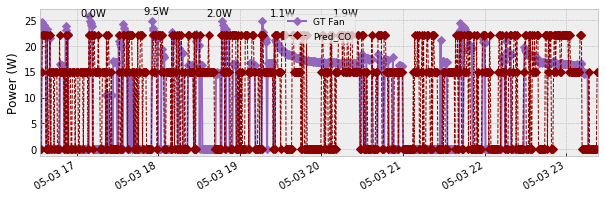

In [52]:
rcParams['figure.figsize'] = (10, 3)
fig, ax1 = plt.subplots();

#umbrales de potencia
a1=[20,1250]

gt['Fan'][a1[0]:a1[1]].plot(ax=ax1, lw=2, c='tab:purple', marker="D")
pred_CO['Fan'][a1[0]:a1[1]].plot(ax=ax1, c='darkred', lw=1, ls='--', marker="D")

ax1.minorticks_off()
ax1.set_ylabel('Power (W)')
ax1.legend(labels=['GT Fan','Pred_CO'], fontsize=9, ncol=1)

err= abs(round((gt['Fan'][a1[0]:a1[1]]-pred_CO['Fan'][a1[0]:a1[1]])[1:6],1))

aux=40
i=0
for e in err:
    ax1.annotate((str(err[i])+'W'), xy=(aux, 140+(abs(err[i]))*0.2), xycoords='axes points', size=10)
    aux=aux+63
    i=i+1



#plt.savefig('./data/images/5.6_MNEAP_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

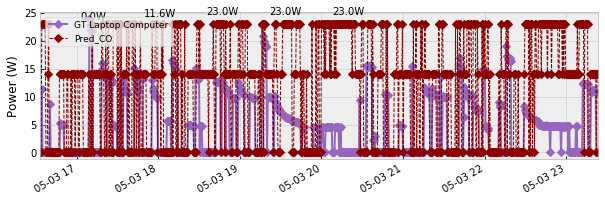

In [53]:
rcParams['figure.figsize'] = (10, 3)
fig, ax1 = plt.subplots();

#umbrales de potencia
a1=[20,1250]

gt['Laptop Computer'][a1[0]:a1[1]].plot(ax=ax1, lw=2, c='tab:purple', marker="D")
pred_CO['Laptop Computer'][a1[0]:a1[1]].plot(ax=ax1, c='darkred', lw=1, ls='--', marker="D")

ax1.minorticks_off()
ax1.set_ylabel('Power (W)')
ax1.legend(labels=['GT Laptop Computer','Pred_CO'], fontsize=9, ncol=1)

err= abs(round((gt['Laptop Computer'][a1[0]:a1[1]]-pred_CO['Laptop Computer'][a1[0]:a1[1]])[1:6],1))

aux=40
i=0
for e in err:
    ax1.annotate((str(err[i])+'W'), xy=(aux, 140+(abs(err[i]))*0.2), xycoords='axes points', size=10)
    aux=aux+63
    i=i+1



#plt.savefig('./data/images/5.6_MNEAP_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

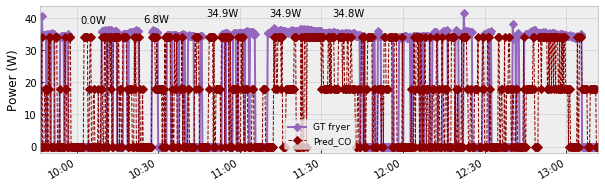

In [54]:
rcParams['figure.figsize'] = (10, 3)
fig, ax1 = plt.subplots();

#umbrales de potencia
a1=[20,1250]

gt['Fryer'][a1[0]:a1[1]].plot(ax=ax1, lw=2, c='tab:purple', marker="D")
pred_CO['Fryer'][a1[0]:a1[1]].plot(ax=ax1, c='darkred', lw=1, ls='--', marker="D")

ax1.minorticks_off()
ax1.set_ylabel('Power (W)')
ax1.legend(labels=['GT fryer','Pred_CO'], fontsize=9, ncol=1)

err= abs(round((gt['Fryer'][a1[0]:a1[1]]-pred_CO['Fryer'][a1[0]:a1[1]])[1:6],1))

aux=40
i=0
for e in err:
    ax1.annotate((str(err[i])+'W'), xy=(aux, 130+(abs(err[i]))*0.2), xycoords='axes points', size=10)
    aux=aux+63
    i=i+1


ax1.set_xticklabels(labels=['10:00','10:30','11:00','11:30','12:00','12:30','13:00','13:30','14:00',''])   
#plt.savefig('./data/images/5.6_MNEAP_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

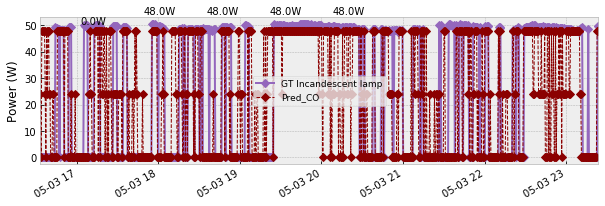

In [55]:
rcParams['figure.figsize'] = (10, 3)
fig, ax1 = plt.subplots();

#umbrales de potencia
a1=[20,1250]

gt['Incandescent lamp'][a1[0]:a1[1]].plot(ax=ax1, lw=2, c='tab:purple', marker="D")
pred_CO['Incandescent lamp'][a1[0]:a1[1]].plot(ax=ax1, c='darkred', lw=1, ls='--', marker="D")

ax1.minorticks_off()
ax1.set_ylabel('Power (W)')
ax1.legend(labels=['GT Incandescent lamp','Pred_CO'], fontsize=9, ncol=1)

err= abs(round((gt['Incandescent lamp'][a1[0]:a1[1]]-pred_CO['Incandescent lamp'][a1[0]:a1[1]])[1:6],1))

aux=40
i=0
for e in err:
    ax1.annotate((str(err[i])+'W'), xy=(aux, 140+(abs(err[i]))*0.2), xycoords='axes points', size=10)
    aux=aux+63
    i=i+1


  
#plt.savefig('./data/images/5.6_MNEAP_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

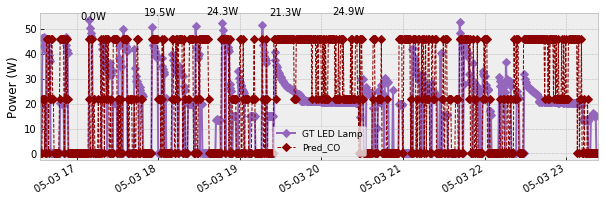

In [56]:
rcParams['figure.figsize'] = (10, 3)
fig, ax1 = plt.subplots();

#umbrales de potencia
a1=[20,1250]

gt['LED Lamp'][a1[0]:a1[1]].plot(ax=ax1, lw=2, c='tab:purple', marker="D")
pred_CO['LED Lamp'][a1[0]:a1[1]].plot(ax=ax1, c='darkred', lw=1, ls='--', marker="D")

ax1.minorticks_off()
ax1.set_ylabel('Power (W)')
ax1.legend(labels=['GT LED Lamp','Pred_CO'], fontsize=9, ncol=1)

err= abs(round((gt['LED Lamp'][a1[0]:a1[1]]-pred_CO['LED Lamp'][a1[0]:a1[1]])[1:6],1))

aux=40
i=0
for e in err:
    ax1.annotate((str(err[i])+'W'), xy=(aux, 140+(abs(err[i]))*0.2), xycoords='axes points', size=10)
    aux=aux+63
    i=i+1


 
#plt.savefig('./data/images/5.6_MNEAP_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

## Métrica RMSE

Esta métrica de la ecuación de la figura es muy utilizada en la comparaciónn de diversos conjuntos de datos, consiste en el error cuadrático medio de la diferencia entre la potencia asignada yˆt(n) y la potencia real yt(n) del proceso de los applicativos , en cada intervalo de tiempo t .

![metricas](metricas.jpg)

In [57]:
round(pd.DataFrame(metrics.loc['RMSE']).transpose(),1)

,Fryer,LED Lamp,Incandescent lamp,Laptop Computer,Fan
RMSE,20.1,19.1,23.0,12.3,11.4


## Resultados de todos los modelos

In [58]:
from nilmtk.metrics import fraction_energy_assigned_correctly, f1_score, error_in_assigned_energy
from nilmtk.metrics import mean_normalized_error_power, rms_error_power 
periods = {'10s':10 , '30s':30, '60s':60, '5min':60*5, '10min':60*10} #, '15min':60*15, '30min':60*30}

dir_predictions = data_dir +'NILM/Results/'
m = {}
classifiers = ['CO', 'FHMM']
methods = ['first', 'mean', 'median']
index = list(labels['Meters'][1:7])

for p_name, sp in periods.items():
    met = []
    for method in methods:
        for clf_name in classifiers:
            print('\nCalculando Metricas: '+ clf_name + '_' + p_name + '_' + method)  
           
            #Datos de Dispositivos: predicción
            input_dir = dir_predictions + clf_name + '_' + p_name + '_' + method +'_pred.h5'
            dataset = DataSet(input_dir)
            predictions=dataset.buildings[1].elec.submeters()       
            
            #Metricas
            f1 = {}; eae = {}; feac = {}; mneap = {}; rmse = {}; e=[];  
            F1 = f1_score(predictions, valid_Devices)
            f1['F1'] = F1*100
            EAE = error_in_assigned_energy(predictions, valid_Devices)
            
            for x in range(len(EAE)): e.append(EAE.iloc[x][0])
            eae['EAE'] = e
            #da error para FEAC
            #feac['FEAC'] = 100*np.ones(6)*(fraction_energy_assigned_correctly(predictions, valid_Devices))
            mneap['MNEAP'] = mean_normalized_error_power(predictions, valid_Devices)
            rmse['RMSE'] = rms_error_power(predictions, valid_Devices)
            met.append(pd.concat([pd.DataFrame(feac, index=valid_Devices.instance()),
                                  pd.DataFrame(f1),
                                  pd.DataFrame(eae, index=valid_Devices.instance()),
                                  pd.DataFrame(mneap),
                                  pd.DataFrame(rmse)],
                                 axis=1).set_index(pd.Index(index)))
            dataset.store.close()        
    m[p_name] = met

##Guardamos resultados
f = open(data_dir +'NILM/metrics.txt',"w")
f.write( str(m) )
f.close()
print('\n\nDone!')



Calculando Metricas: CO_10s_first

Calculando Metricas: FHMM_10s_first

Calculando Metricas: CO_10s_mean

Calculando Metricas: FHMM_10s_mean

Calculando Metricas: CO_10s_median

Calculando Metricas: FHMM_10s_median

Calculando Metricas: CO_30s_first

Calculando Metricas: FHMM_30s_first

Calculando Metricas: CO_30s_mean

Calculando Metricas: FHMM_30s_mean

Calculando Metricas: CO_30s_median

Calculando Metricas: FHMM_30s_median

Calculando Metricas: CO_60s_first

Calculando Metricas: FHMM_60s_first

Calculando Metricas: CO_60s_mean

Calculando Metricas: FHMM_60s_mean

Calculando Metricas: CO_60s_median

Calculando Metricas: FHMM_60s_median

Calculando Metricas: CO_5min_first

Calculando Metricas: FHMM_5min_first

Calculando Metricas: CO_5min_mean

Calculando Metricas: FHMM_5min_mean

Calculando Metricas: CO_5min_median

Calculando Metricas: FHMM_5min_median

Calculando Metricas: CO_10min_first

Calculando Metricas: FHMM_10min_first

Calculando Metricas: CO_10min_mean

Calculando Metric

## Otras Metricas: métricas Promedio

In [59]:
m_mean = {}

#cols=['FEAC','F1','EAE','MNEAP','RMSE']

cols=['F1','EAE','MNEAP','RMSE']
labels=['CO-first', 'CO-mean', 'CO-median', 'FHMM-first', 'FHMM-mean' ,'FHMM-median']
per=['10s','30s','60s','5min','10min'] #,'15min','30min']

for c in cols:
    m_mean[c] = pd.DataFrame([#CO FIRST
                             [m['10s'][0][c].mean(),m['30s'][0][c].mean(),m['60s'][0][c].mean(),
                              m['5min'][0][c].mean(),m['10min'][0][c].mean()],
                            #  m['15min'][0][c].mean(),m['30min'][0][c].mean()],
                              #CO MEAN
                             [m['10s'][2][c].mean(),m['30s'][2][c].mean(),m['60s'][2][c].mean(),
                              m['5min'][2][c].mean(),m['10min'][2][c].mean()],
                              #m['15min'][2][c].mean(),m['30min'][2][c].mean()],
                              #CO MEDIAN
                             [m['10s'][4][c].mean(),m['30s'][4][c].mean(),m['60s'][4][c].mean(),
                              m['5min'][4][c].mean(),m['10min'][4][c].mean()],
                              #m['15min'][4][c].mean(),m['30min'][4][c].mean()],
                             #FHMM FIRST
                             [m['10s'][1][c].mean(),m['30s'][1][c].mean(),m['60s'][1][c].mean(),
                             m['5min'][1][c].mean(),m['10min'][1][c].mean()],
                             # m['15min'][1][c].mean(),m['30min'][1][c].mean()],
                             #FHMM MEAN            
                             [m['10s'][3][c].mean(),m['30s'][3][c].mean(),m['60s'][3][c].mean(),
                              m['5min'][3][c].mean(),m['10min'][3][c].mean()],
                              #m['15min'][3][c].mean(),m['30min'][3][c].mean()],
                             #FHMM MEDIAN
                             [m['10s'][5][c].mean(),m['30s'][5][c].mean(),m['60s'][5][c].mean(),
                              m['5min'][5][c].mean(),m['10min'][5][c].mean()]],columns=per, index=labels).transpose()
                             # m['15min'][5][c].mean(),m['30min'][5][c].mean()]],
                              
m_mean


{'F1':         CO-first    CO-mean  CO-median  FHMM-first  FHMM-mean  FHMM-median
 10s    67.337848  67.348394  67.019496   67.798006  65.754109    65.710652
 30s    62.310078  61.418592  62.681407   62.862990  63.109509    61.136826
 60s    60.330636  59.725587  58.389659   57.595998  56.492393    55.103540
 5min   19.382716  16.176155  16.707875   20.829034  18.965922    18.834499
 10min   9.000000   7.058824   7.200000   16.532508  16.058824    16.058824,
 'EAE':        CO-first  CO-mean  CO-median  FHMM-first  FHMM-mean  FHMM-median
 10s         0.0      0.0        0.0         0.0        0.0          0.0
 30s         0.0      0.0        0.0         0.0        0.0          0.0
 60s         0.0      0.0        0.0         0.0        0.0          0.0
 5min        0.0      0.0        0.0         0.0        0.0          0.0
 10min       0.0      0.0        0.0         0.0        0.0          0.0,
 'MNEAP':        CO-first   CO-mean  CO-median  FHMM-first  FHMM-mean  FHMM-median
 10s    

## Maximos


In [60]:
cols=['F1','EAE','MNEAP','RMSE']

maxs=pd.concat([m_mean['F1'].transpose().max(),
                m_mean['EAE'].transpose().min(),
                m_mean['MNEAP'].transpose().min(),
                m_mean['RMSE'].transpose().min()], axis=1)
maxs.columns=cols
maxs = maxs.transpose()
round(maxs,2)

,10s,30s,60s,5min,10min
F1,67.80,63.11,60.33,20.83,16.53
EAE,0.00,0.00,0.00,0.00,0.00
MNEAP,0.66,0.75,0.79,0.71,0.66
RMSE,14.18,14.80,14.59,13.03,12.47


## Correspondencia de Indice

In [61]:
cols=['F1','EAE','MNEAP','RMSE']

maxs_i=pd.concat([m_mean['F1'].transpose().idxmax(),
                 m_mean['EAE'].transpose().idxmin(),
                 m_mean['MNEAP'].transpose().idxmin(),
                 m_mean['RMSE'].transpose().idxmin()], axis=1)
maxs_i.columns=cols
maxs_i = maxs_i.transpose()
maxs_i

,10s,30s,60s,5min,10min
F1,FHMM-first,FHMM-mean,CO-first,FHMM-first,FHMM-first
EAE,CO-first,CO-first,CO-first,CO-first,CO-first
MNEAP,FHMM-first,FHMM-mean,FHMM-mean,FHMM-mean,FHMM-mean
RMSE,FHMM-first,FHMM-mean,FHMM-mean,FHMM-mean,FHMM-mean


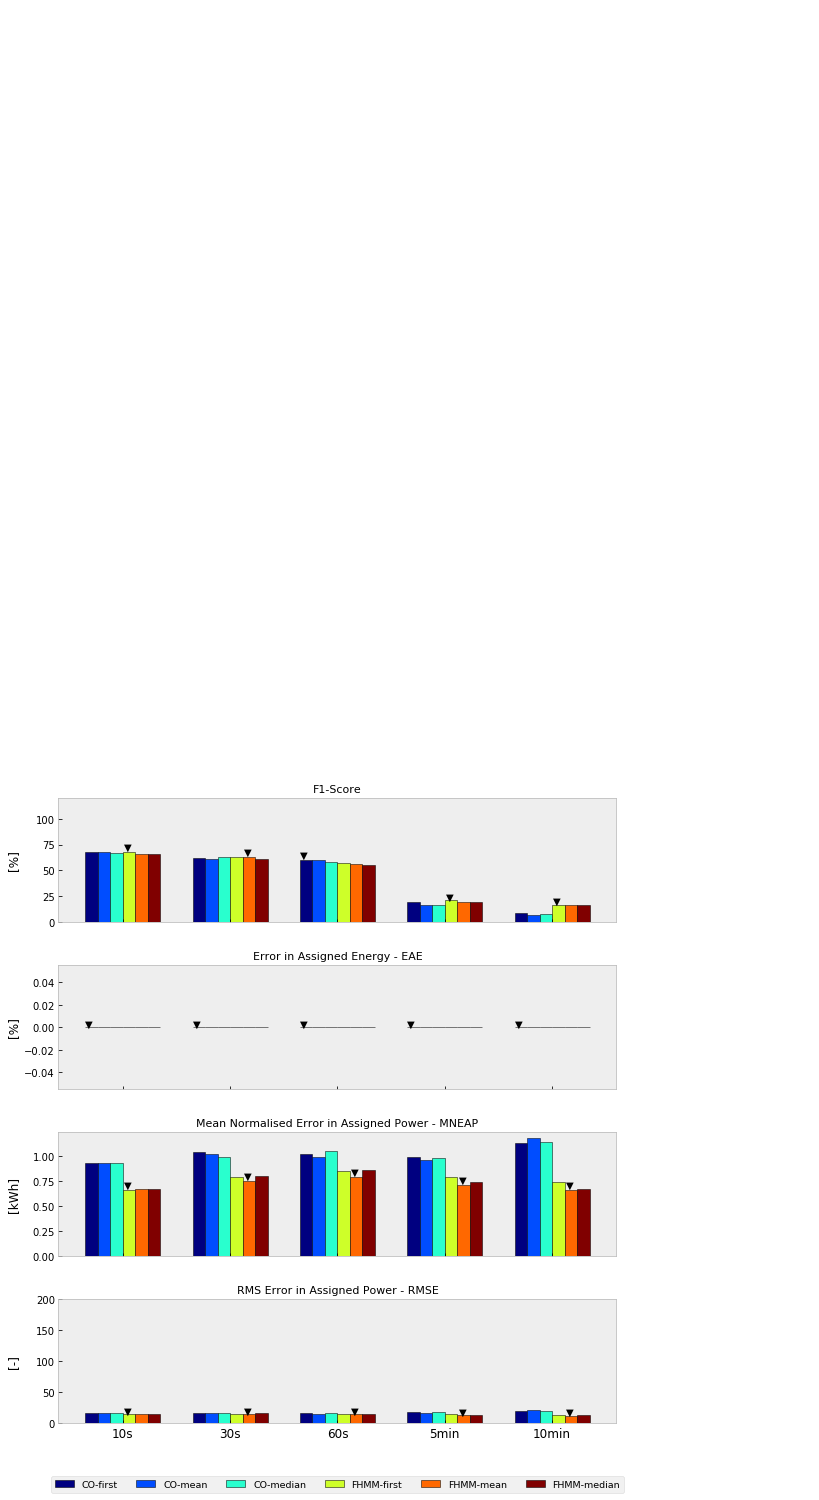

In [62]:
rcParams['figure.figsize'] = (10, 11.5)
fig, (ax2,ax3,ax4,ax5) = plt.subplots(4, 1, sharex=True, gridspec_kw={'hspace': 0.35})
cols=['F1','EAE','MNEAP','RMSE']
ylabels=['[%]','[%]','[kWh]','[-]','[W]']
per=['10s','30s','60s','5min','10min'] # ,'15min','30min']

labels={'CO-first':-0.35, 'CO-mean':-0.22, 'CO-median':-0.11, 'FHMM-first':0.01, 'FHMM-mean':0.13 ,'FHMM-median':0.245}

c=0
for ax in fig.get_axes():      
    m_mean[cols[c]].plot.bar(ax=ax, width=0.7, edgecolor='black', linewidth=0.5, legend=False, cmap="jet")
    ax.set(ylabel=ylabels[c])
    ax.grid(b=None)
    x = 0
    for p in per:
        ax.annotate("▼", xy=(labels[maxs_i[p][cols[c]]]+x, maxs[p][cols[c]]+maxs[p][cols[c]]*0.03))
        x+=1
    c+=1
    
ax5.set_xticklabels(labels=per, rotation=0, fontdict={'fontsize':12})
fig.align_ylabels([(ax2,ax3,ax4,ax5)])
ax2.set(ylim=(0,120))
ax2.set_yticks([0,25,50,75,100])

ax5.set_yticks([0,50,100,150,200])

ax2.set_title('F1-Score', fontsize=11, loc='center')
ax3.set_title('Error in Assigned Energy - EAE', fontsize=11, loc='center')
ax4.set_title('Mean Normalised Error in Assigned Power - MNEAP', fontsize=11, loc='center')
ax5.set_title('RMS Error in Assigned Power - RMSE', fontsize=11, loc='center')
lgd = ax5.legend(labels.keys(), loc='lower center', ncol=6, bbox_to_anchor=(0.5, -0.6),fontsize=9.5)


#ax2.annotate("90.5%", xy=(0.68, 98)); #30s FHMM-mean
#ax3.annotate("0.19", xy=(6.22, 1.4)); #30min FHMM-median
ax3.annotate("kWh", xy=(6.22, 0.9)); #30min FHMM-median
#ax4.annotate("0.24", xy=(6.22, 0.7)); #30min FHMM-median
#ax5.annotate("41.5", xy=(6.22, 120)); #30min FHMM-median
ax5.annotate("   W", xy=(6.22, 90)); #30min FHMM-median


plt.savefig('./data/images/5.7_All_metrics.svg', bbox_inches='tight', transparent=True)

pass

In [63]:
print('FHMM-first')
print(m['30s'][1])
print('\nFHMM-mean')
print(m['30s'][3])
print('\nFHMM-median')
print(m['30s'][5])

FHMM-first
                          F1  EAE     MNEAP       RMSE
Fryer              66.253102  0.0  0.606932  18.955983
LED Lamp           83.478261  0.0  0.946860  21.016588
Incandescent lamp  77.253219  0.0  0.433457  19.596312
Laptop Computer    22.686567  0.0  1.205601   7.470839
Fan                64.643799  0.0  0.739454  10.352105

FHMM-mean
                          F1  EAE     MNEAP       RMSE
Fryer              65.979381  0.0  0.558300  18.636817
LED Lamp           82.895928  0.0  0.734083  17.108441
Incandescent lamp  78.535097  0.0  0.406614  20.325576
Laptop Computer    23.423423  0.0  1.301034   7.722713
Fan                64.713715  0.0  0.725862  10.223542

FHMM-median
                          F1  EAE     MNEAP       RMSE
Fryer              64.080100  0.0  0.620197  19.266406
LED Lamp           81.911263  0.0  0.847845  18.916272
Incandescent lamp  73.981191  0.0  0.541978  23.203059
Laptop Computer    22.478386  0.0  1.296196   7.701029
Fan                63.233190  

### Resultados del mejor modelo
En vista de los resultados del obtenidos, se propone la elección del modelo FHMM entrenado con datos promedio de dispositivos cada 30 segundos. Este modelo solo se considera adecuado para la desagregación de datos promedio de potencia activa medidos en cabecera cada 30 segundos.

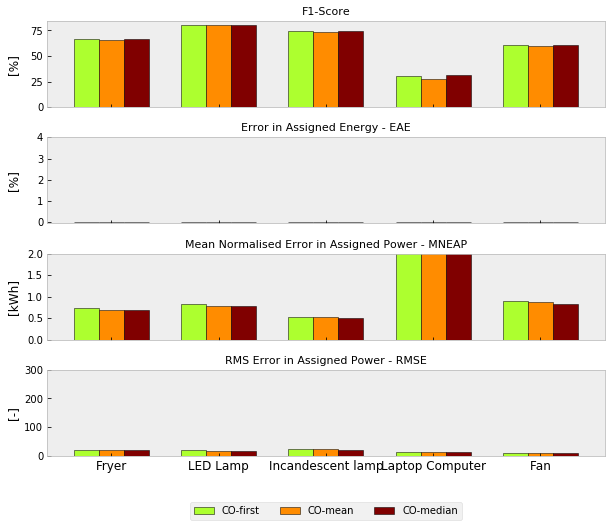

In [64]:
rcParams['figure.figsize'] = (10, 8)

fig, (ax2,ax3,ax4,ax5) = plt.subplots(4, 1, sharex=False, gridspec_kw={'hspace': 0.35})

#cols=['FEAC','F1','EAE','MNEAP','RMSE']
cols=['F1','EAE','MNEAP','RMSE']

ylabels=['[%]','[%]','[kWh]','[-]','[W]']

#labels=['FHMM-first', 'FHMM-mean' ,'FHMM-median']

labels=['CO-first', 'CO-mean' ,'CO-median']

c=0

for ax in fig.get_axes():
    #FHMM
  #  df=pd.DataFrame([m['30s'][1][cols[c]],m['30s'][3][cols[c]],m['30s'][5][cols[c]]]).transpose()
    #CO
    df=pd.DataFrame([m['30s'][0][cols[c]],m['30s'][2][cols[c]],m['30s'][4][cols[c]]]).transpose()
  
    #if ax==ax1:
    #    df['FEAC'].mean().plot.barh(ax=ax1, width=0.7, edgecolor='black', linewidth=0.5, legend=False,   color=['greenyellow','darkorange','maroon'])
    #else:
    #     df.plot.bar(ax=ax, width=0.7, edgecolor='black', linewidth=0.5, legend=False,   color=['greenyellow','darkorange','maroon'])
 
    df.plot.bar(ax=ax, width=0.7, edgecolor='black', linewidth=0.5, legend=False,   color=['greenyellow','darkorange','maroon'])
    ax.set(ylabel=ylabels[c])
    ax.grid(b=None)
    c+=1   
    

ax2.set_xticklabels('')
ax3.set_xticklabels('')
ax4.set_xticklabels('')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=0, fontdict={'fontsize':12})
fig.align_ylabels([(ax1,ax2,ax3,ax4,ax5)])
ax3.set_yticks([0,1,2,3,4])
ax4.set(ylim=(0,1.8))
ax4.set_yticks([0,0.5,1,1.5,2])
ax5.set(ylim=(0,270))
ax5.set_yticks([0,100,200,300])
ax2.set_title('F1-Score', fontsize=11, loc='center')
ax3.set_title('Error in Assigned Energy - EAE', fontsize=11, loc='center')
ax4.set_title('Mean Normalised Error in Assigned Power - MNEAP', fontsize=11, loc='center')
ax5.set_title('RMS Error in Assigned Power - RMSE', fontsize=11, loc='center')
lgd = ax5.legend(labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.8))


plt.savefig('./data/images/5.8_All_metrics_2.svg', bbox_inches='tight', transparent=True)

pass

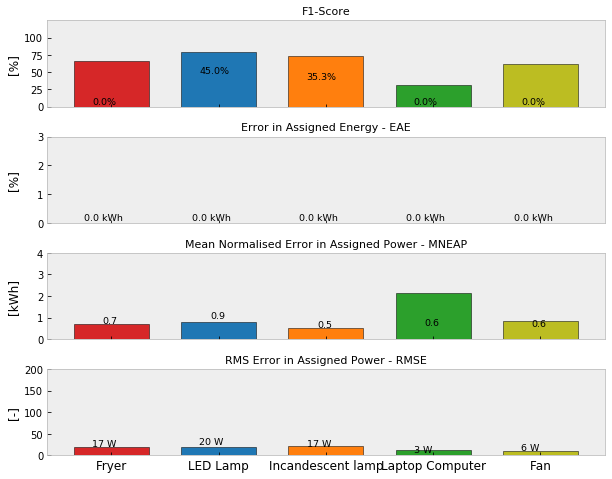

In [65]:
rcParams['figure.figsize'] = (10, 8)

fig, (ax2,ax3,ax4,ax5) = plt.subplots(4, 1, sharex=False, gridspec_kw={'hspace': 0.35})
#cols=['FEAC','F1','EAE','MNEAP','RMSE']

cols=['F1','EAE','MNEAP','RMSE']

ylabels=['[%]','[%]','[kWh]','[-]','[W]']
colors=['tab:red','tab:blue','tab:orange','tab:green','tab:olive','tab:purple','tab:cyan']
c=0

for ax in fig.get_axes():
    df=pd.DataFrame(m['30s'][4][cols[c]])
    df[cols[c]].plot.bar(ax=ax, width=0.7, edgecolor='black', linewidth=0.5, legend=False, color=colors)
    ax.set(ylabel=ylabels[c])
    ax.grid(b=None)
    c+=1


ax2.set_xticklabels('')
ax3.set_xticklabels('')
ax4.set_xticklabels('')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=0, fontdict={'fontsize':12})

fig.align_ylabels([(ax2,ax3,ax4,ax5)])

ax2.set(ylim=(0,125))
ax3.set(ylim=(0,1))
ax4.set(ylim=(0,0.7))
ax5.set(ylim=(0,110))

ax2.set_yticks([0,25,50,75,100])
ax3.set_yticks([0,1,2,3])
ax4.set_yticks([0,1,2,3,4])
ax5.set_yticks([0,50,100,150,200])


ax2.set_title('F1-Score', fontsize=11, loc='center')
ax3.set_title('Error in Assigned Energy - EAE', fontsize=11, loc='center')
ax4.set_title('Mean Normalised Error in Assigned Power - MNEAP', fontsize=11, loc='center')
ax5.set_title('RMS Error in Assigned Power - RMSE', fontsize=11, loc='center')

df=pd.DataFrame(m['10min'][5])

for x in range(5):ax2.annotate(str(round(df['F1'][x],1))+'%', xy=(x-0.18 , df['F1'][x]+4),fontsize=9.5)
for x in range(5):ax3.annotate(str(round(df['EAE'][x],1))+' kWh', xy=(x-0.25 , df['EAE'][x]+0.1),fontsize=9.5)
for x in range(5):ax4.annotate(str(round(df['MNEAP'][x],1)), xy=(x-0.08 , df['MNEAP'][x]+0.03),fontsize=9.5)
for x in range(5):ax5.annotate(str(round(df['RMSE'][x]))+' W', xy=(x-0.18 , df['RMSE'][x]+5),fontsize=9.5)

plt.savefig('./data/images/5.9_Metrics_FHMM_30min_median.svg', bbox_inches='tight', transparent=True)

In [66]:
valid_Devices.total_energy()

Calculating total_energy for ElecMeterID(instance=6, building=1, dataset='DSUAL') ...   

active    0.543011
dtype: float64

In [67]:
valid_Devices.energy_per_meter()

5/5 ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])nstance=1)])])

,"(2, 1, DSUAL)","(3, 1, DSUAL)","(4, 1, DSUAL)","(5, 1, DSUAL)","(6, 1, DSUAL)"
active,0.142029,0.120981,0.182069,0.030783,0.06715
apparent,NaN,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN,NaN


### Replicando el entrenamiento del modelo

In [70]:
from nilmtk import DataSet
from nilmtk.legacy.disaggregate import CombinatorialOptimisation

train = DataSet('ualm2.h5')



train.set_window(start="2023-05-03 11:48:08", end="2023-05-03 16:23:57")


train_elec=train.buildings[1].elec 

#dispositivos a entrenar: [Lights_1, Lights_2, HVAC_1, HVAC_2, HVAC_4, Rack]
train_Devices=train_elec.select(instance=[2,3,4,5,6])

#opcional: asignación manual de estados de dispositivos
num_states={train_Devices[2]:2, train_Devices[3]:3, train_Devices[4]:4,
            train_Devices[5]:5, train_Devices[6]:6}

#entrenamiento y exportación del modelo
CO_60s_median=CombinatorialOptimisation()
CO_60s_median.MIN_CHUNK_LENGTH=1
CO_60s_median.train(train_Devices,
                        num_states_dict={}, #en otro caso: { }
                        ac_type='active',
                        sample_period=1800,
                        resample_kwargs={'how':'median'})




print('\n\nDone!')


Training model for submeter 'ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])'
Training model for submeter 'ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)])'
Training model for submeter 'ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='incandescent lamp', instance=1)])'
Training model for submeter 'ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='laptop computer', instance=1)])'
Training model for submeter 'ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])'
Done training!


Done!


In [69]:
CO_60s_median.model

[{'states': array([0]),
  'training_metadata': ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])},
 {'states': array([0]),
  'training_metadata': ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)])},
 {'states': array([0]),
  'training_metadata': ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='incandescent lamp', instance=1)])},
 {'states': array([0]),
  'training_metadata': ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='laptop computer', instance=1)])},
 {'states': array([0]),
  'training_metadata': ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])}]